In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os  # manipula o sistema operacioal, criar pasta mover arquovos dentro do python e ele é nativo vem junto com o oython
from mmq import metodo_minimos_quadrados

In [335]:
# aqui algoritimo para criar a tabela no NAN que esta no fium da aula do attentus
# prof criou esse algoritimo por que os alunos pediam pq ao tentar aplicar as empresas nao tinha a tabela no NAN ai o rpof criou
# para ajudar os alunos a implementar nas empresas

In [336]:
df_tabela_ligantes = pd.read_excel(
    os.path.join("dados", "df_tabela_ligantes.xlsx") # usa o join para ficar generico em relação as \\ ou // para windows mac ou linus, fica generalizado
)
df_tabela_ligantes

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes
0,1,00:00:00,00:15:00,601
1,2,00:15:00,00:30:00,190
2,3,00:30:00,00:45:00,180
3,4,00:45:00,01:00:00,177
4,5,01:00:00,01:15:00,162
...,...,...,...,...
91,92,22:45:00,23:00:00,920
92,93,23:00:00,23:15:00,897
93,94,23:15:00,23:30:00,571
94,95,23:30:00,23:45:00,560


In [337]:
os.path.join("dados", "df_tabela_ligantes.xlsx")

'dados\\df_tabela_ligantes.xlsx'

In [338]:
df_duracoes = pd.read_excel(
    os.path.join("dados", "df_duracoes.xlsx")
)
df_duracoes

,duracao_conexao,numero_ligantes,percentagem_relativa,percentagem_acumulada
0,0,0,0.000,0.000
1,5,870,0.087,0.087
2,10,2210,0.221,0.308
3,15,2940,0.294,0.602
4,20,1710,0.171,0.773
5,25,1360,0.136,0.909
6,30,590,0.059,0.968
7,35,250,0.025,0.993
8,40,70,0.007,1.000


<Axes: xlabel='duracao_conexao'>

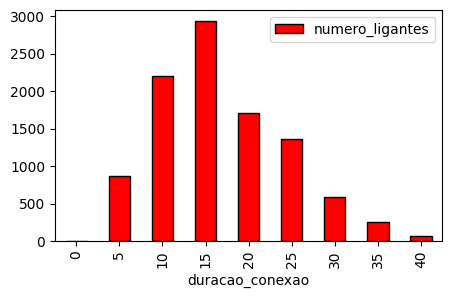

In [339]:
df_duracoes.plot(x="duracao_conexao",
                 y="numero_ligantes",
                 kind="bar",
                 figsize=(5, 3),
                 color="red",
                 edgecolor="black")

In [340]:
# fazer um aleatorio com a distribuicao que se tem a coisa, tem que ser um aleatorio de acordoc om isso
# prof foi criativo ao fazer isso na aula
# media ponderada tem que ser similar a essa aqui parece que perto dos 15 seg, olhamos no pdf com a explicação Algoritimo NAN
# eq 5 grau consegue ajustar os porntos
# 0 a 900 s  - 900 seg é 15 min

<Axes: xlabel='percentagem_acumulada', ylabel='duracao_conexao'>

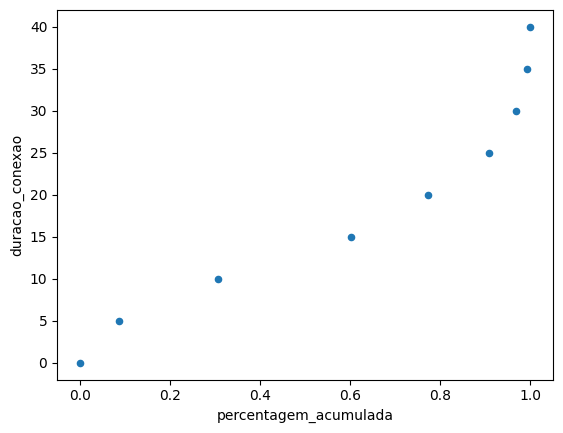

In [341]:
# fizemos analise de dados e descorbrimos que tem um distribuicao espeficica
# vamos fazer outro grafico agora
df_duracoes.plot(
    x="percentagem_acumulada",
    y="duracao_conexao",
    kind="scatter"
)

In [342]:
#para achar o polonimio que ajusta os dados, para saber o tempo das suas ligações, a maioria dura te de 10 a 20 seg
coefs = metodo_minimos_quadrados.mmq(
    df_duracoes["percentagem_acumulada"],
    df_duracoes["duracao_conexao"],
    5 
)  # 5 é o grau, acho que do polinomio, daria os coeficientes do polinomio de 5 grau, vamos ver se esta ajustanndo bem se nao esta com overfitting
#avaliar a qualidade desse polinomio
coefs

array([  7.25285080e+02,  -1.67791097e+03,   1.41326154e+03,
        -5.23808659e+02,   1.01010563e+02,  -2.06253859e-01])

In [343]:
x = np.linspace(0, 1, 1000)
y = np.polyval(coefs, x) # o polyval apioca um polinomio acima de algusndados que vc da
print(x[::100].round(1))
print(y[::100].round(1))
# foramaram 1000 pontinhos de 0 ate 1
# primeiro lemento no y deu negativo, precisaria usar o absolute para deixar sempre positivo

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
[ -0.2   5.9   7.9   9.3  11.3  13.8  16.   17.6  19.4  24.2]


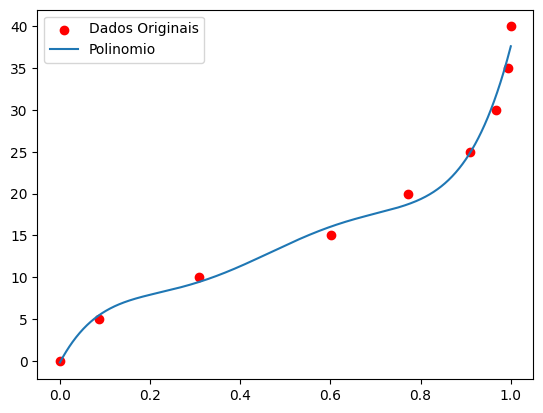

In [344]:
percentagens_acumuladas = df_duracoes["percentagem_acumulada"]
duracoes = df_duracoes["duracao_conexao"]
plt.scatter(percentagens_acumuladas, duracoes,
            color="red", label="Dados Originais")
plt.plot(x, y, label="Polinomio")
plt.legend()
plt.show()



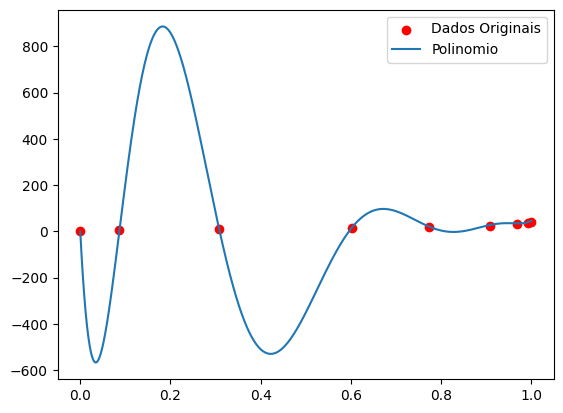

In [345]:
#testando aumnetar grau do pokinomio para vermso que da overfitting
coefs = metodo_minimos_quadrados.mmq(
    df_duracoes["percentagem_acumulada"],
    df_duracoes["duracao_conexao"],
    8
)

# ------------------------------------

x = np.linspace(0, 1, 1000)
y = np.polyval(coefs, x) # o polyval apioca um polinomio acima de algusndados que vc da

# __________________________________

percentagens_acumuladas = df_duracoes["percentagem_acumulada"]
duracoes = df_duracoes["duracao_conexao"]
plt.scatter(percentagens_acumuladas, duracoes,
            color="red", label="Dados Originais")
plt.plot(x, y, label="Polinomio")
plt.legend()
plt.show()

# queligacao que dura 1000 segundos, a curva nao descreve o fenomeno

In [346]:
coefs = metodo_minimos_quadrados.mmq(
    df_duracoes["percentagem_acumulada"],
    df_duracoes["duracao_conexao"],
    5
) # mudamos grau para 5 de volta que descreve melhor o fenomeno, ajusta melhor a curva
coefs

array([  7.25285080e+02,  -1.67791097e+03,   1.41326154e+03,
        -5.23808659e+02,   1.01010563e+02,  -2.06253859e-01])

In [347]:
# nosso polinimio para muoto perto de zero esta dando negativo, precisa corrigir isso
np.polyval(coefs, 0)   # o plyval vc da um dominus ele te da o functus

-0.20625385920448025

In [348]:
np.polyval(coefs, [0, 0.1, 0.2, 0.3]) # passei aqui 4 dominus ele me deu os coeficientes do polinomio
# array([-0.20625386,  5.90943916,  7.89703842,  9.28356129])   aqui são -02 seg, 5.98 seg etc

array([-0.20625386,  5.90943916,  7.89703842,  9.28356129])

In [349]:
# vamos testar se ele poklinomio vai dar uma boa media, tem que se aproximar da sua realidade
# media ponderada -+ 15 segundos
tempos_aleatorios = []
for _ in range(10_000):
    alpha = np.random.random() # gera aleatorio de 0  a 1
    tempo = np.polyval(coefs, alpha)
    tempos_aleatorios.append(tempo)

np.mean(tempos_aleatorios)

14.366061686277785

In [350]:
# fvamos simulat 601 liacoes agora
df_tabela_ligantes.loc[0]  # isso é um dataframe

rotulo                          1
hora_inicio              00:00:00
hora_fim                 00:15:00
numero_medio_ligantes         601
Name: 0, dtype: object

In [351]:
qtd_ligacoes = \
    df_tabela_ligantes.loc[0, "numero_medio_ligantes"]
qtd_ligacoes

601

In [352]:
# sortear o tempo que cada ligação vai chegar para nossa simulação
np.random.seed(0)
momentos_ligacoes = np.random.randint(0, 900, size=qtd_ligacoes)
momentos_ligacoes[:10]

array([684, 559, 629, 192, 835, 763, 707, 359,   9, 723], dtype=int32)

In [353]:
df_duracoes.loc[0, "duracao_conexao"]

0

In [354]:
df_duracoes.iloc[0, 0]

0

In [355]:
momentos_ligacoes[:10]

array([684, 559, 629, 192, 835, 763, 707, 359,   9, 723], dtype=int32)

In [356]:
momentos_ligacoes.sort() # sort poe os numeros na ordem, e ele modifica o prodprio objeto cuidado, ele rankeia
momentos_ligacoes[:10]

array([ 0,  3,  4,  4,  7,  9, 11, 11, 13, 13], dtype=int32)

In [357]:
# vamos comecar a simulaçãp
atendentes: list[dict] = [] # vamos usar uma kisata de dicinarios com tempo de incio e fim da ligação para saber se pode atender ou nao se esta livre ou nao, mas da para fazer com dataframe
# se fosse com dataframe seria complicado, ralvez usar iterrows que percorre o dataframe toda e isso diminio perfomance do seu cosigo muit

In [358]:
np.set_printoptions(legacy="1.13")

In [359]:
momento_ligacao = momentos_ligacoes[0]
momento_ligacao

0

In [360]:
# vamos sortear um aleatorio
np.random.seed(0)
aleatorio = np.random.rand()
tempo_duracao = abs(np.polyval(coefs, aleatorio)) # vamos cuidar para nao dar negativo abs
print(tempo_duracao)


14.9651548682


In [361]:
# é a primeuroa ligaçãp? como saber isso? tem varios jeitos
#checagem Igor escolheu
if atendentes == []:
    atendente = {
        "inicio": momento_ligacao,
        "fim": momento_ligacao + tempo_duracao
    }
    atendentes.append(atendente)

atendentes



[{'inicio': 0, 'fim': 14.965154868196022}]

In [362]:
type(atendentes)

list

In [363]:
type(atendente)

dict

In [364]:
momento_ligacao = momentos_ligacoes[1]
momento_ligacao

3

In [365]:
espera_maxima = 10
tempo_descanso = 0  # se o sindicato pedir ja tem a variavel kkkkkkkkk


In [366]:
np.random.seed(1)
aleatorio = np.random.random()
tempo_duracao = abs(np.polyval(coefs, aleatorio))
tempo_duracao 

11.718611909498971

In [367]:
# saber se o atendente pode atender ele
for atendente in atendentes:
    fim = atendente["fim"] + tempo_descanso

    if momento_ligacao + espera_maxima < fim:   # <= se deixar o igual, vai a ligacao assim que ele terminar a anterior, isso tem que ver com o cliewnte como fucniona
        ocupado = True
    else: 
        ocupado = False 

    if not ocupado:   #aqui eu tengho que fazer outra checagem

        if momento_ligacao + espera_maxima > fim:
            atendente["inicio"] = momento_ligacao + espera_maxima
        else:
            atendente["inicio"] = fim
        
        atendente["fim"] = atendente['incio'] + tempo_duracao
        break  # se nao bater aqui vai para o else

else:  # seria que todos os atendentes estao ocupados entao ele tem que criar um novo, else no for é estranho pr programadores mas no python pode isso é bom

    atendente = {
        "inicio": momento_ligacao,
        "fim": momento_ligacao + tempo_duracao
    }
    atendentes.append(atendente)
atendentes

# to fazedno um for manual


[{'inicio': 0, 'fim': 14.965154868196022},
 {'inicio': 3, 'fim': 14.718611909498971}]

In [368]:
# fazer o fim tornar o inicio do rpoimo como reghra geral da problema, precisa tomar cuidado aqui
# ficar esperto com isso, para liar caso a caso

In [369]:
# to fazedno um for manual
momento_ligacao = momentos_ligacoes[2]
momento_ligacao  # teecrira ligação chega em 4
# ao inves de percorrer na mao vamos fazer um for para as 601 ligações
# o for nao tem como quebra em partes, o for manual ajuda voce a quebrar e ver o que acontece e saber se esta acontecendo o esperado

4

In [370]:
for momento_ligacao in momentos_ligacoes:
    print(momento_ligacao)

0
3
4
4
7
9
11
11
13
13
16
19
23
24
24
25
26
28
29
29
32
32
33
36
36
41
41
42
43
43
44
47
53
53
56
57
58
59
61
63
67
69
70
72
72
73
74
80
80
82
83
84
86
87
87
87
88
89
91
91
93
93
94
94
95
98
99
102
106
106
107
110
111
112
114
115
117
119
120
121
123
126
128
128
128
128
129
129
130
131
134
135
136
136
136
137
138
139
139
143
146
147
147
148
148
148
149
149
151
152
152
153
160
163
164
166
168
169
174
174
174
174
176
177
180
180
182
183
184
189
191
192
195
197
197
197
199
201
201
201
201
203
207
207
209
209
209
209
212
213
216
217
219
221
223
225
226
226
226
227
227
228
228
232
234
237
244
246
248
248
254
256
256
256
257
259
260
265
265
269
273
273
274
274
274
275
276
277
280
280
281
282
284
284
286
287
288
289
290
290
291
291
291
292
292
296
297
300
305
305
307
307
307
314
314
321
322
323
323
323
324
324
324
326
326
327
328
329
335
336
339
340
341
341
343
347
347
348
349
353
355
357
357
359
360
360
365
368
368
369
369
370
371
371
373
373
376
376
377
381
383
383
387
388
392
393
394
396
3

In [371]:
# agora ajuntou as celulas e só adicionou essa aqui -> for momento_ligacao in momentos_ligacoes:

np.random.seed(5)
tempo_descanso = 0
espera_maxima = 10
atendentes = []
for momento_ligacao in momentos_ligacoes: # só adicionamos esse linha do que ja haviamso testado antes
    aleatorio = np.random.random()
    tempo_duracao = abs(np.polyval(coefs, aleatorio))

    for atendente in atendentes:
        fim = atendente["fim"] + tempo_descanso

        if momento_ligacao + espera_maxima < fim:
            ocupado = True
        else:
            ocupado = False

        if not ocupado:

            if momento_ligacao + espera_maxima > fim:
                atendente["inicio"] = momento_ligacao + espera_maxima
            else:
                atendente["inicio"] = fim
            
            atendente["fim"] = atendente["inicio"] + tempo_duracao
            break
    else:

        atendente = {
            "inicio": momento_ligacao,
            "fim": momento_ligacao + tempo_duracao
        }
        atendentes.append(atendente)
        
atendentes

[{'inicio': 904, 'fim': 914.4037564982807},
 {'inicio': 906, 'fim': 917.86945228372167},
 {'inicio': 909, 'fim': 917.37356632866181},
 {'inicio': 900, 'fim': 912.04701461181367},
 {'inicio': 906, 'fim': 913.54143974652425},
 {'inicio': 906, 'fim': 909.2110175449335},
 {'inicio': 907, 'fim': 923.65667308248339},
 {'inicio': 898, 'fim': 910.80468815160725},
 {'inicio': 892, 'fim': 918.91345867401799},
 {'inicio': 892, 'fim': 899.6962495432706},
 {'inicio': 895, 'fim': 921.10612199350487},
 {'inicio': 894, 'fim': 924.69074239242343},
 {'inicio': 894, 'fim': 912.97138604541612},
 {'inicio': 895, 'fim': 911.50408245771962},
 {'inicio': 896, 'fim': 906.24103253233636},
 {'inicio': 896, 'fim': 913.60372669768321},
 {'inicio': 899, 'fim': 917.10414350589645},
 {'inicio': 899, 'fim': 928.75678690002758},
 {'inicio': 899, 'fim': 903.08006092171786},
 {'inicio': 899, 'fim': 906.40232584615558}]

In [372]:
len(atendentes)

20

In [373]:
# aqui teos um problem o primeiro vai ser sempre ser mais estressado que o ultiumo ele vai ser mais usado que o ulktimo
# vamos embaralhar para fazer a simulação
np.random.permutation([1, 2, 3, 4, 5, 6, 7, 8]) # embaralhar

array([2, 1, 5, 4, 8, 6, 3, 7])

In [374]:
# embraralhar diminui o tempode osciosidade e equilibra o tempo de trabalho de todos
# aqui foi suulação de 00:00 as 00:15 da noite com 601 simulações
np.random.seed(5)
tempo_descanso = 0
espera_maxima = 10
atendentes = []
for momento_ligacao in momentos_ligacoes: # só adicionamos esse linha do que ja haviamso testado antes
    aleatorio = np.random.random()
    tempo_duracao = abs(np.polyval(coefs, aleatorio))

    atendentes = list(np.random.permutation(atendentes))

    for atendente in atendentes:
        fim = atendente["fim"] + tempo_descanso

        if momento_ligacao + espera_maxima < fim:
            ocupado = True
        else:
            ocupado = False

        if not ocupado:

            if momento_ligacao + espera_maxima > fim:
                atendente["inicio"] = momento_ligacao + espera_maxima
            else:
                atendente["inicio"] = fim
            
            atendente["fim"] = atendente["inicio"] + tempo_duracao
            break
    else:

        atendente = {
            "inicio": momento_ligacao,
            "fim": momento_ligacao + tempo_duracao
        }
        atendentes.append(atendente)
        
atendentes

[{'inicio': 899, 'fim': 909.29559843811921},
 {'inicio': 900, 'fim': 910.89334430853955},
 {'inicio': 899, 'fim': 932.21236755469567},
 {'inicio': 909, 'fim': 917.53861755803973},
 {'inicio': 904, 'fim': 920.23396461861057},
 {'inicio': 899, 'fim': 908.85265704300502},
 {'inicio': 867, 'fim': 894.9962068760093},
 {'inicio': 901, 'fim': 917.66657940193431},
 {'inicio': 907, 'fim': 915.17518229722555},
 {'inicio': 906, 'fim': 913.65133331310551},
 {'inicio': 896, 'fim': 906.82228408233289},
 {'inicio': 892, 'fim': 907.66966275774632},
 {'inicio': 882, 'fim': 901.13837905289324},
 {'inicio': 883, 'fim': 902.83508526014623},
 {'inicio': 814, 'fim': 843.61932082301757},
 {'inicio': 899, 'fim': 907.73089614696869},
 {'inicio': 896, 'fim': 912.80887286644202},
 {'inicio': 906, 'fim': 930.77650856562752},
 {'inicio': 906, 'fim': 914.0496784226475}]

In [375]:
len(atendentes)

19

In [376]:
df_tabela_ligantes

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes
0,1,00:00:00,00:15:00,601
1,2,00:15:00,00:30:00,190
2,3,00:30:00,00:45:00,180
3,4,00:45:00,01:00:00,177
4,5,01:00:00,01:15:00,162
...,...,...,...,...
91,92,22:45:00,23:00:00,920
92,93,23:00:00,23:15:00,897
93,94,23:15:00,23:30:00,571
94,95,23:30:00,23:45:00,560


In [377]:
np.random.seed(5)
tempo_descanso = 0
espera_maxima = 10
coluna_nan = []
for i, linha in df_tabela_ligantes.iterrows():
    qtd_ligacoes = linha["numero_medio_ligantes"]

    momentos_ligacoes = np.random.randint(0, 900, size=qtd_ligacoes)
    momentos_ligacoes.sort()

    atendentes = []
    for momento_ligacao in momentos_ligacoes:
        aleatorio = np.random.random()
        tempo_duracao = abs(np.polyval(coefs, aleatorio))

        atendentes = list(np.random.permutation(atendentes))

        for atendente in atendentes:
            fim = atendente["fim"] + tempo_descanso

            if momento_ligacao + espera_maxima < fim:
                ocupado = True
            else:
                ocupado = False

            if not ocupado:

                if momento_ligacao + espera_maxima > fim:
                    atendente["inicio"] = momento_ligacao + espera_maxima
                else:
                    atendente["inicio"] = fim
                
                atendente["fim"] = atendente["inicio"] + tempo_duracao
                break
        else:

            atendente = {
                "inicio": momento_ligacao,
                "fim": momento_ligacao + tempo_duracao
            }
            atendentes.append(atendente)
    
    nan = len(atendentes)
    coluna_nan.append(nan)

coluna_nan

[20,
 9,
 8,
 9,
 8,
 5,
 6,
 7,
 5,
 5,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 3,
 4,
 6,
 6,
 8,
 7,
 20,
 21,
 23,
 23,
 41,
 41,
 41,
 45,
 66,
 59,
 60,
 67,
 70,
 75,
 71,
 75,
 66,
 64,
 62,
 68,
 57,
 57,
 56,
 60,
 64,
 67,
 63,
 70,
 69,
 67,
 64,
 66,
 71,
 66,
 70,
 67,
 68,
 66,
 68,
 71,
 68,
 69,
 73,
 62,
 55,
 51,
 52,
 48,
 45,
 44,
 39,
 38,
 41,
 36,
 36,
 40,
 36,
 34,
 30,
 31,
 31,
 26,
 26,
 26,
 23,
 18,
 18,
 18]

In [378]:
# Attentus comeca agora primeira coisa é ter o NAN numero de atendentes necessarios, parece que temo NAD tn
# tb comsiderar os regiems de traalho 3h, 4h, 6h, 
# numero de fucnionarios parece que nao impacta no attentus, nao é critico pode jogar la em cima 1000 ex
# o que é critico é qtd de funcionarios de cada turno, parece que o numero de funcionario de cada turno tb nao interfere, parece que pode jogar numero alto tb nao interfere eu acho


In [379]:
df_tabela_ligantes["nan"] = coluna_nan
df_tabela_ligantes

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes,nan
0,1,00:00:00,00:15:00,601,20
1,2,00:15:00,00:30:00,190,9
2,3,00:30:00,00:45:00,180,8
3,4,00:45:00,01:00:00,177,9
4,5,01:00:00,01:15:00,162,8
...,...,...,...,...,...
91,92,22:45:00,23:00:00,920,26
92,93,23:00:00,23:15:00,897,23
93,94,23:15:00,23:30:00,571,18
94,95,23:30:00,23:45:00,560,18


--- 
# Attentus


In [380]:
import pulp as plp


In [381]:
df_nan = df_tabela_ligantes.copy()
df_nan

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes,nan
0,1,00:00:00,00:15:00,601,20
1,2,00:15:00,00:30:00,190,9
2,3,00:30:00,00:45:00,180,8
3,4,00:45:00,01:00:00,177,9
4,5,01:00:00,01:15:00,162,8
...,...,...,...,...,...
91,92,22:45:00,23:00:00,920,26
92,93,23:00:00,23:15:00,897,23
93,94,23:15:00,23:30:00,571,18
94,95,23:30:00,23:45:00,560,18


In [382]:
#df nad tem que importar, é um arquivo excell
df_nad = pd.read_excel(
    os.path.join("dados", "nad.xlsx")
)
df_nad
# enc é o encargo acho, por cada trabalahdor
# por nad alto por que se for baixa ele fica dando unfeasable


,regime,enc
0,3,540
1,4,680
2,6,960


In [383]:
# montar a F.O agora
from itertools import product


In [384]:
df_nad

,regime,enc
0,3,540
1,4,680
2,6,960


In [385]:
df_nad["regime"]

0    3
1    4
2    6
Name: regime, dtype: int64

In [386]:
regimes = \
    df_nad["regime"].to_dict()
regimes

{0: 3, 1: 4, 2: 6}

In [387]:
inicios = \
    df_nan["hora_inicio"].to_dict()
inicios

{0: datetime.time(0, 0),
 1: datetime.time(0, 15),
 2: datetime.time(0, 30),
 3: datetime.time(0, 45),
 4: datetime.time(1, 0),
 5: datetime.time(1, 15),
 6: datetime.time(1, 30),
 7: datetime.time(1, 45),
 8: datetime.time(2, 0),
 9: datetime.time(2, 15),
 10: datetime.time(2, 30),
 11: datetime.time(2, 45),
 12: datetime.time(3, 0),
 13: datetime.time(3, 15),
 14: datetime.time(3, 30),
 15: datetime.time(3, 45),
 16: datetime.time(4, 0),
 17: datetime.time(4, 15),
 18: datetime.time(4, 30),
 19: datetime.time(4, 45),
 20: datetime.time(5, 0),
 21: datetime.time(5, 15),
 22: datetime.time(5, 30),
 23: datetime.time(5, 45),
 24: datetime.time(6, 0),
 25: datetime.time(6, 15),
 26: datetime.time(6, 30),
 27: datetime.time(6, 45),
 28: datetime.time(7, 0),
 29: datetime.time(7, 15),
 30: datetime.time(7, 30),
 31: datetime.time(7, 45),
 32: datetime.time(8, 0),
 33: datetime.time(8, 15),
 34: datetime.time(8, 30),
 35: datetime.time(8, 45),
 36: datetime.time(9, 0),
 37: datetime.time(9,

In [388]:
# combinação de um com todos e todos com de incios com regimes , product que faz isso
# vou fazer o product entre os indices e nao pelos nomes indice de 0 a 2 e de 0 a 96
lista_variaveis = list(product(regimes, inicios))
lista_variaveis # as vartiaveis tem que se somar para ser as variaveis, e tupla nao soma com tupla precisamos mudar os dados para o pulp para cirar a variavell

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (0, 42),
 (0, 43),
 (0, 44),
 (0, 45),
 (0, 46),
 (0, 47),
 (0, 48),
 (0, 49),
 (0, 50),
 (0, 51),
 (0, 52),
 (0, 53),
 (0, 54),
 (0, 55),
 (0, 56),
 (0, 57),
 (0, 58),
 (0, 59),
 (0, 60),
 (0, 61),
 (0, 62),
 (0, 63),
 (0, 64),
 (0, 65),
 (0, 66),
 (0, 67),
 (0, 68),
 (0, 69),
 (0, 70),
 (0, 71),
 (0, 72),
 (0, 73),
 (0, 74),
 (0, 75),
 (0, 76),
 (0, 77),
 (0, 78),
 (0, 79),
 (0, 80),
 (0, 81),
 (0, 82),
 (0, 83),
 (0, 84),
 (0, 85),
 (0, 86),
 (0, 87),
 (0, 88),
 (0, 89),
 (0, 90),
 (0, 91),
 (0, 92),
 (0, 93),
 (0, 94),
 (0, 95),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 

In [389]:
prob = plp.LpProblem(
    name="Attentus", sense=plp.LpMinimize
)
prob

Attentus:
MINIMIZE
None
VARIABLES

In [390]:
pulp_variaveis = plp.LpVariable.dicts(
    "A", lista_variaveis, lowBound=0, cat=plp.LpInteger
)
pulp_variaveis
#pulp é um prateleira de solvers ele te ajuda a chamr os solvers
# a chave vira valor, todo dicionario é uma traducao e a chave voce consegue somar
# o valor vira a chave no dicionario

{(0, 0): A_(0,_0),
 (0, 1): A_(0,_1),
 (0, 2): A_(0,_2),
 (0, 3): A_(0,_3),
 (0, 4): A_(0,_4),
 (0, 5): A_(0,_5),
 (0, 6): A_(0,_6),
 (0, 7): A_(0,_7),
 (0, 8): A_(0,_8),
 (0, 9): A_(0,_9),
 (0, 10): A_(0,_10),
 (0, 11): A_(0,_11),
 (0, 12): A_(0,_12),
 (0, 13): A_(0,_13),
 (0, 14): A_(0,_14),
 (0, 15): A_(0,_15),
 (0, 16): A_(0,_16),
 (0, 17): A_(0,_17),
 (0, 18): A_(0,_18),
 (0, 19): A_(0,_19),
 (0, 20): A_(0,_20),
 (0, 21): A_(0,_21),
 (0, 22): A_(0,_22),
 (0, 23): A_(0,_23),
 (0, 24): A_(0,_24),
 (0, 25): A_(0,_25),
 (0, 26): A_(0,_26),
 (0, 27): A_(0,_27),
 (0, 28): A_(0,_28),
 (0, 29): A_(0,_29),
 (0, 30): A_(0,_30),
 (0, 31): A_(0,_31),
 (0, 32): A_(0,_32),
 (0, 33): A_(0,_33),
 (0, 34): A_(0,_34),
 (0, 35): A_(0,_35),
 (0, 36): A_(0,_36),
 (0, 37): A_(0,_37),
 (0, 38): A_(0,_38),
 (0, 39): A_(0,_39),
 (0, 40): A_(0,_40),
 (0, 41): A_(0,_41),
 (0, 42): A_(0,_42),
 (0, 43): A_(0,_43),
 (0, 44): A_(0,_44),
 (0, 45): A_(0,_45),
 (0, 46): A_(0,_46),
 (0, 47): A_(0,_47),
 (0, 48): A_

In [391]:
coeficientes = []
for indice_regime, indice_perido in lista_variaveis:
    encargo = df_nad.loc[indice_regime, "enc"]
    coeficientes.append(encargo)
print(coeficientes[::10])

[540, 540, 540, 540, 540, 540, 540, 540, 540, 540, 680, 680, 680, 680, 680, 680, 680, 680, 680, 680, 960, 960, 960, 960, 960, 960, 960, 960, 960]


In [392]:
coeficientes

[540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 540,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680,
 680

In [393]:
fo = plp.lpSum(
    [coef * pulp_variaveis[var]
     for coef, var in zip(coeficientes, lista_variaveis)]
)

prob += fo, "custo"
prob

Attentus:
MINIMIZE
540*A_(0,_0) + 540*A_(0,_1) + 540*A_(0,_10) + 540*A_(0,_11) + 540*A_(0,_12) + 540*A_(0,_13) + 540*A_(0,_14) + 540*A_(0,_15) + 540*A_(0,_16) + 540*A_(0,_17) + 540*A_(0,_18) + 540*A_(0,_19) + 540*A_(0,_2) + 540*A_(0,_20) + 540*A_(0,_21) + 540*A_(0,_22) + 540*A_(0,_23) + 540*A_(0,_24) + 540*A_(0,_25) + 540*A_(0,_26) + 540*A_(0,_27) + 540*A_(0,_28) + 540*A_(0,_29) + 540*A_(0,_3) + 540*A_(0,_30) + 540*A_(0,_31) + 540*A_(0,_32) + 540*A_(0,_33) + 540*A_(0,_34) + 540*A_(0,_35) + 540*A_(0,_36) + 540*A_(0,_37) + 540*A_(0,_38) + 540*A_(0,_39) + 540*A_(0,_4) + 540*A_(0,_40) + 540*A_(0,_41) + 540*A_(0,_42) + 540*A_(0,_43) + 540*A_(0,_44) + 540*A_(0,_45) + 540*A_(0,_46) + 540*A_(0,_47) + 540*A_(0,_48) + 540*A_(0,_49) + 540*A_(0,_5) + 540*A_(0,_50) + 540*A_(0,_51) + 540*A_(0,_52) + 540*A_(0,_53) + 540*A_(0,_54) + 540*A_(0,_55) + 540*A_(0,_56) + 540*A_(0,_57) + 540*A_(0,_58) + 540*A_(0,_59) + 540*A_(0,_6) + 540*A_(0,_60) + 540*A_(0,_61) + 540*A_(0,_62) + 540*A_(0,_63) + 540*A_(0,_64

In [394]:
prob.numVariables()

288

In [395]:
prob.numConstraints()

0

In [396]:
# a logica ele é enrolada por que ele tem que perceber que ele tem que bvoltar acho que em relação ao 96 periodos
# custo minimo para atender a demanda de modo decente, o attentus vai e minimiza o custo, isso é o discurso de venda
# 

In [397]:
# vamos entender a logica daquela volta, entender a volta que tem que dar, vamos reduyzir o problerma
# varrer os 96 periodos
# para experimentear e testar vamos de 0 a 7 
lista = [0, 1, 2, 3, 4, 5, 6, 7]
lista


[0, 1, 2, 3, 4, 5, 6, 7]

In [398]:
# vamos fazer um janela de tamanho 3
janela = 3 # nem sei se vou usar ela



In [399]:
# j = 2
lista[0:3]

[0, 1, 2]

In [400]:
# j = 3
lista[1:4] # nao tem logica AQUI AINDA , mas esta nascentdo ela é am phantasma e vou comecando a deixar ad oculus, encontrar a lgoca que vai ser por tras disso
# eu vou testando essa andada p me ajudar 


[1, 2, 3]

In [401]:
# j = 4
lista[2:5] # mao escreve sozinho ja percebi a logica, proximo seria lista[3:6] acho

[2, 3, 4]

In [402]:
# j = 5
lista[3:6]

[3, 4, 5]

In [403]:
# j = 6 , estamos olhando para o ultimo elemento do indice do periodo da list de teste para tentar achar a logica
lista[4:7]
# quero dar a volta para ver o que acontece

[4, 5, 6]

In [404]:
# j = 7
lista[5:8] # agora é a merda pq schegeui no final

[5, 6, 7]

In [405]:
# j = 0
lista[6:9] # teria que dar 0 para dar a volta
# achar uma outra logica agora

[6, 7]

In [406]:
#vamos reunir todas que derao certo, reunir para ficar tudo na minha frente para me ajudar a buscar uma nova semiose, testar novos aspectos
print(lista[0:3])
print(lista[1:4])
print(lista[2:5])
print(lista[3:6])
print(lista[4:7])
print(lista[5:8])

[0, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]
[4, 5, 6]
[5, 6, 7]


In [407]:
# forca uma coisa para pegar os dois ultimos e uma coisa para pegar o primeiro
# 6, 7]   esses dis ultimos e dae um extend acho
#[6, 7] + [0]   o = opera com metodo extend que daria [6, 7, 0]
#[6, 7].extend([0])

# j = 0
# print(lista[6:]) # para pegar os dois ultimos  [6]é o mesmo que -2
# print(lista[-2])
# print(lista[-2:], lista[0])
# print(lista[-2:], lista[:0]) # da kista vazia por que é exclusive
# print(lista[-2:], lista[:1])# fomos chutando ate acertar, ja ganhei iutra marca diferente mas parecisa ainda
print(lista[-2:] + lista[:1]) # falta o j = 1, como eu faço?

[6, 7, 0]


In [408]:
# falta o j = 1, como eu faço?
lista[-3:0] + lista[:2] 

[0, 1]

In [409]:
lista[-3:] + lista[:2] 

[5, 6, 7, 0, 1]

In [410]:
lista[-1:] + lista[:2] 

[7, 0, 1]

In [411]:
# agora vamos generalizar
print(lista[-2:] + lista[:1]) 
print(lista[-1:] + lista[:2]) 
print(lista[0:3])
print(lista[1:4])
print(lista[2:5])
print(lista[3:6])
print(lista[4:7])
print(lista[5:8])

[6, 7, 0]
[7, 0, 1]
[0, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]
[4, 5, 6]
[5, 6, 7]


In [412]:
# vamos comecar com o if whuile etc da logica mais simples
# print(lista[0:3]) # j = 2, janela = 3
# print(lista[1:4]) # j = 3, jan = 3
# print(lista[2:5]) # j = 4, jan = 3
# print(lista[3:6]) # j = 5, jan = 3
# print(lista[4:7]) # j = 6, jan = 3
# print(lista[5:8]) # j = 7, jan = 3
# se a variavel janela impacta ela tem que entrar aqui na logica
#lista[j-2:j+1] acho que funcionaria, mas temos que usar a janela refletindo ate onde ela volta para peela pegar o que tem que pegar
# a janlea quando ela muda ela vai impactar
# [6, 7, 0] a acao é de voltar, define para frente e volta, vai varrendo de tras para frente


# # aqui é a proposta de generalização
# print(lista[0:2+1]) # j = 2, janela = 3,e agpra para generalizar o lado esquerdo o zero "0" , (j - janela + 1) isos é um plapite para a logica do lado esquerdo
# print(lista[1:3+1]) # j = 3, jan = 3
# print(lista[2:4+1]) # j = 4, jan = 3
# print(lista[3:5+1]) # j = 5, jan = 3
# print(lista[4:6+1]) # j = 6, jan = 3
# print(lista[5:7+1]) # j = 7, jan = 3


#lista[j-jan+1:j+1]  -> para o lado esquerdo
print(lista[2-3+1:2+1]) # j = 2, janela = 3,e agpra para generalizar o lado esquerdo o zero "0" , (j - janela + 1) isos é um plapite para a logica do lado esquerdo
print(lista[3-3+1:3+1]) # j = 3, jan = 3
print(lista[4-3+1:4+1]) # j = 4, jan = 3
print(lista[5-3+1:5+1]) # j = 5, jan = 3
print(lista[6-3+1:6+1]) # j = 6, jan = 3
print(lista[7-3+1:7+1]) # j = 7, jan = 3

[0, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]
[4, 5, 6]
[5, 6, 7]


In [413]:
#vamos criar a logica para essa parte agora, colocar as anotações do j e da janela

print(lista[-2:] + lista[:1]) # j = 0, jan=3 
print(lista[-1:] + lista[:2]) # j = 1, jan=3

# daria isso:
# [6, 7, 0]
# [7, 0, 1]



[6, 7, 0]
[7, 0, 1]


In [414]:
# voltar um passo com a virgula para ver o que estava dando
print(lista[-2:], lista[:1]) # j = 0, jan=3    # j-jan+1  teriaque dar -2, que é o primeiro termo que achamos
print(lista[-1:], lista[:2]) # j = 1, jan=3    # j-jan+1  teriaque dar -1

[6, 7] [0]
[7] [0, 1]


In [415]:
print(lista[0-3+1:], lista[:1]) # j = 0, jan=3    # para o termo do lado dir é "j+1"
print(lista[1-3+1:], lista[:2]) # j = 1, jan=3    

[6, 7] [0]
[7] [0, 1]


In [416]:
print(lista[0-3+1:], lista[:0+1]) # j = 0, jan=3    # para o termo do lado dir é "j+1"
print(lista[1-3+1:], lista[:1+1]) # j = 1, jan=3    

[6, 7] [0]
[7] [0, 1]


In [417]:
print(lista[0-3+1:] + lista[:0+1]) # j = 0, jan=3    # para o termo do lado dir é "j+1"
print(lista[1-3+1:] + lista[:1+1]) # j = 1, jan=3    

[6, 7, 0]
[7, 0, 1]


In [418]:
# agora é fazer o if
# lista[j-jan+1:j+1]    [2, 3, 4, 5, 6, 7]
# lista[j-jan+1:] + lista[:j+1] [0,1]
print(lista[0-3+1:] + lista[:0+1]) # j = 0, jan=3    
print(lista[1-3+1:] + lista[:1+1]) # j = 1, jan=3 
print(lista[2-3+1:2+1]) # j = 2, janela = 3
print(lista[3-3+1:3+1]) # j = 3, jan = 3
print(lista[4-3+1:4+1]) # j = 4, jan = 3
print(lista[5-3+1:5+1]) # j = 5, jan = 3
print(lista[6-3+1:6+1]) # j = 6, jan = 3
print(lista[7-3+1:7+1]) # j = 7, jan = 3



[6, 7, 0]
[7, 0, 1]
[0, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]
[4, 5, 6]
[5, 6, 7]


In [419]:
# vamos mudar janela parab tamanho para seguir o codigo que ja estava preparado do Igor
def retorna_lista(j, tamanho, lista): # se o tamanho da sua janela as vezes nao é tao grande voce nao precisa do j acho, mas o if depende do tramnho e do j
    if j >= tamanho - 1:
        return lista[j-tamanho+1 : j+1]
    else:
        return lista[j-tamanho+1 :] + lista[: j+1]

In [420]:
retorna_lista(j=4, tamanho=3, lista=lista) # uktimo elemento é o propotio j tamnaho 3

[2, 3, 4]

In [421]:
retorna_lista(j=5, tamanho=3, lista=lista)

[3, 4, 5]

In [422]:
retorna_lista(j=6, tamanho=3, lista=lista)

[4, 5, 6]

In [423]:
retorna_lista(j=7, tamanho=3, lista=lista) # por isso fizemosmuma lista pewquena para conferir e depois fazer a garnde

[5, 6, 7]

In [424]:
retorna_lista(j=1, tamanho=3, lista=lista)

[7, 0, 1]

In [425]:
retorna_lista(j=95, tamanho=12,
              lista=list(inicios)) # variavel inicios esta la em cima, ja haviamos criado

[84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]

In [426]:
# e se coolocar o j maior que a lista seria legal colocarmos uma protecao para isso nao acontecer, mas aquino nosso codigo nao seja qualquer j e qualquer tamanho e meio que nos proteje sobre isso
retorna_lista(j=0, tamanho=12, lista=list(inicios))

[85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 0]

In [427]:
# ate aqui falamos da resticao 1
# vamos montar ela aqui, essa resticao 1
df_nan

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes,nan
0,1,00:00:00,00:15:00,601,20
1,2,00:15:00,00:30:00,190,9
2,3,00:30:00,00:45:00,180,8
3,4,00:45:00,01:00:00,177,9
4,5,01:00:00,01:15:00,162,8
...,...,...,...,...,...
91,92,22:45:00,23:00:00,920,26
92,93,23:00:00,23:15:00,897,23
93,94,23:15:00,23:30:00,571,18
94,95,23:30:00,23:45:00,560,18


In [428]:
# for sem o iterrows so para vermos
# for x in df_nan:
#     print(x)  # o ierrowspara fazer a iteração nas linhas nao as colunas

In [429]:
# vamos fazer as iterações
# for j, linha in df_nan.iterrows():
#     # print(j, linha, sep="\n")
#     # print("-" * 50)
#     # preciso pegar o vamoor do nan de cada
#     nan = linha["nan"]
#     # print(j, nan)# preciso do tamanho tb
#     for regime in regimes:
#         # print(regime) # repetido (0 1 2) 96x, dado um regime qual o tamanho dele
#         # print(regimes[regime]) # repete (3 4 6) 96x (acho), a partir disso que vou obter o tamanho que 12 16 e 24
#         tamanho = regimes[regime] * 4 # vou variar ela la na tela mesmo
#         lista = retorna_lista(j=j, tamanho=tamanho, lista=list(inicios))
#         # print(regime, lista)
#         lista_combinada = [(regime, i) for i in lista] # for dentro de uma lista o Igor tenta evitar mas aconteceu aqui, se cham list comphreension essa lista usando o for dentro da lista
#         lista_traduzida = [pulp_variaveis[tupla] for tupla in lista_combinada]
        
#         # print(lista_combinada)
#         print(lista_traduzida)

#     print("-" * 20)

    # (0, 85)... essa tupla tem que ficar a varivel nossa, ai entra o pulp por que ele sim soma com outro essa tulpa desse jeito nao soma

In [430]:
for j, linha in df_nan.iterrows():

    nan = linha["nan"]
    linha_restricao = []
    for regime in regimes:
        
        tamanho = regimes[regime] * 4 
        lista = retorna_lista(j=j, tamanho=tamanho, lista=list(inicios))
        
        lista_combinada = [(regime, i) for i in lista] # for dentro de uma lista o Igor tenta evitar mas aconteceu aqui, se cham list comphreension essa lista usando o for dentro da lista
        lista_traduzida = [pulp_variaveis[tupla] for tupla in lista_combinada]
        
        linha_restricao += lista_traduzida  # vai por as 3 linhas(de tipo 12, 16 e 24) na mesma lista
    prob += plp.lpSum(linha_restricao) >= nan
prob

   


Attentus:
MINIMIZE
540*A_(0,_0) + 540*A_(0,_1) + 540*A_(0,_10) + 540*A_(0,_11) + 540*A_(0,_12) + 540*A_(0,_13) + 540*A_(0,_14) + 540*A_(0,_15) + 540*A_(0,_16) + 540*A_(0,_17) + 540*A_(0,_18) + 540*A_(0,_19) + 540*A_(0,_2) + 540*A_(0,_20) + 540*A_(0,_21) + 540*A_(0,_22) + 540*A_(0,_23) + 540*A_(0,_24) + 540*A_(0,_25) + 540*A_(0,_26) + 540*A_(0,_27) + 540*A_(0,_28) + 540*A_(0,_29) + 540*A_(0,_3) + 540*A_(0,_30) + 540*A_(0,_31) + 540*A_(0,_32) + 540*A_(0,_33) + 540*A_(0,_34) + 540*A_(0,_35) + 540*A_(0,_36) + 540*A_(0,_37) + 540*A_(0,_38) + 540*A_(0,_39) + 540*A_(0,_4) + 540*A_(0,_40) + 540*A_(0,_41) + 540*A_(0,_42) + 540*A_(0,_43) + 540*A_(0,_44) + 540*A_(0,_45) + 540*A_(0,_46) + 540*A_(0,_47) + 540*A_(0,_48) + 540*A_(0,_49) + 540*A_(0,_5) + 540*A_(0,_50) + 540*A_(0,_51) + 540*A_(0,_52) + 540*A_(0,_53) + 540*A_(0,_54) + 540*A_(0,_55) + 540*A_(0,_56) + 540*A_(0,_57) + 540*A_(0,_58) + 540*A_(0,_59) + 540*A_(0,_6) + 540*A_(0,_60) + 540*A_(0,_61) + 540*A_(0,_62) + 540*A_(0,_63) + 540*A_(0,_64

In [431]:
prob.numConstraints()

96

In [432]:
prob.status # para ver que o modelo nao esta resolvido, sig Not Solved

0

In [433]:
plp.LpStatus

{0: 'Not Solved',
 1: 'Optimal',
 -1: 'Infeasible',
 -2: 'Unbounded',
 -3: 'Undefined'}

In [434]:
plp.LpStatus[0]

'Not Solved'

In [435]:
plp.LpStatus[prob.status]

'Not Solved'

In [436]:
plp.listSolvers(onlyAvailable=True) # só tem um de graça

['PULP_CBC_CMD']

In [437]:
solver = plp.getSolver('PULP_CBC_CMD')

In [438]:
prob.solve(solver)

1

In [439]:
plp.LpStatus[prob.status]

'Optimal'

In [440]:
prob.objective.value()

153480.0

In [441]:
# tenho 288 vaeiaveis eu tenho que varrer e descobrir quais deram maior que 0
for i, v in enumerate(prob.variables()):
    print(v.name, "", v.varValue)

A_(0,_0)  0.0
A_(0,_1)  0.0
A_(0,_10)  0.0
A_(0,_11)  0.0
A_(0,_12)  0.0
A_(0,_13)  0.0
A_(0,_14)  0.0
A_(0,_15)  0.0
A_(0,_16)  0.0
A_(0,_17)  0.0
A_(0,_18)  0.0
A_(0,_19)  0.0
A_(0,_2)  0.0
A_(0,_20)  0.0
A_(0,_21)  0.0
A_(0,_22)  0.0
A_(0,_23)  0.0
A_(0,_24)  0.0
A_(0,_25)  0.0
A_(0,_26)  0.0
A_(0,_27)  0.0
A_(0,_28)  0.0
A_(0,_29)  0.0
A_(0,_3)  0.0
A_(0,_30)  0.0
A_(0,_31)  0.0
A_(0,_32)  0.0
A_(0,_33)  0.0
A_(0,_34)  0.0
A_(0,_35)  0.0
A_(0,_36)  5.0
A_(0,_37)  0.0
A_(0,_38)  0.0
A_(0,_39)  0.0
A_(0,_4)  0.0
A_(0,_40)  0.0
A_(0,_41)  0.0
A_(0,_42)  0.0
A_(0,_43)  0.0
A_(0,_44)  0.0
A_(0,_45)  0.0
A_(0,_46)  0.0
A_(0,_47)  0.0
A_(0,_48)  0.0
A_(0,_49)  0.0
A_(0,_5)  0.0
A_(0,_50)  0.0
A_(0,_51)  0.0
A_(0,_52)  0.0
A_(0,_53)  0.0
A_(0,_54)  0.0
A_(0,_55)  0.0
A_(0,_56)  0.0
A_(0,_57)  0.0
A_(0,_58)  3.0
A_(0,_59)  0.0
A_(0,_6)  0.0
A_(0,_60)  0.0
A_(0,_61)  0.0
A_(0,_62)  0.0
A_(0,_63)  0.0
A_(0,_64)  0.0
A_(0,_65)  0.0
A_(0,_66)  0.0
A_(0,_67)  0.0
A_(0,_68)  0.0
A_(0,_69)  0.0
A_

In [442]:
# vamos trabsforar em um dataframe, passar para um resuktado que ajude a leiura para o meu usuário
# dar um jeito de limpara a string do pulp acho e deixar ela mais legivel para o susuario (acho)
# resultados = []
# for i, v in enumerate(prob.variables()):
#     # print(v.name, "", v.varValue)
#     valor_var = v.varValue

# quero ectrauir o indice e seria deificla a string do jeito que stava A_(2,_94)(exemplo)


In [443]:
resultados = []
for v_tulpa, v_pulp in pulp_variaveis.items():
    #print(v_pulp.varValue, v_tulpa)

    indice_regime, indice_inicio = v_tulpa
    nome_regime = regimes[indice_regime]
    nome_inicio = inicios[indice_inicio]
    # print(nome_regime, nome_inicio)

    resultados.append({
        "regime": nome_regime,
        "inicio": nome_inicio,
        "valor": v_pulp.varValue
    })
resultados

    # tem q generalizar e quando eu n ao quiser de 15 em 15 min ou de 12 em 12 horas acho, isso vem de tabela_ligantes do excel
    # seu codugo tem que dirigir aquilo, que gera aquilo para min e 
    # perguntar na tela, voce trabalha de que horas a que horas, ex 11 horas e depois quebrar ela em 15 em 15 min,
    # vc vai definir quebrar o dia do seu ckiente de acordo com uma lista finita de possibilidades, poderia ser 2 em 2 min vc usa o mod
    # se vc selecionar 7 minutos nao vai dar para usar mod, esse codigo voce que vai ter que cuidar do codigo, nao acha que seria legal o 
    # usuario dar imput no seu codigo ele pode ferrar o seu coduigo se por algo errado


    # vamos tranformar isso num dataframe

[{'regime': 3, 'inicio': datetime.time(0, 0), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(0, 15), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(0, 30), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(0, 45), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(1, 0), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(1, 15), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(1, 30), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(1, 45), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(2, 0), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(2, 15), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(2, 30), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(2, 45), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(3, 0), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(3, 15), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(3, 30), 'valor': 0.0},
 {'regime': 3, 'inicio': datetime.time(3, 45), 'valor': 0.0},
 {'regime': 

In [444]:
df_resultados = pd.DataFrame(resultados)
df_resultados

,regime,inicio,valor
0,3,00:00:00,0.0
1,3,00:15:00,0.0
2,3,00:30:00,0.0
3,3,00:45:00,0.0
4,3,01:00:00,0.0
...,...,...,...
283,6,22:45:00,1.0
284,6,23:00:00,0.0
285,6,23:15:00,0.0
286,6,23:30:00,2.0


In [445]:
df_resultados.loc[df_resultados["valor"] > 0] # filtrar para ver só

,regime,inicio,valor
36,3,09:00:00,5.0
58,3,14:30:00,3.0
113,4,04:15:00,1.0
124,4,07:00:00,9.0
125,4,07:15:00,1.0
126,4,07:30:00,2.0
127,4,07:45:00,2.0
128,4,08:00:00,6.0
129,4,08:15:00,1.0
132,4,09:00:00,2.0


In [446]:
# pivotando a tabela filtrada acima
df_resultados_pivotado = df_resultados.pivot_table(columns="regime", index="inicio", values="valor")
df_resultados_pivotado # aqui a primur coluna é o indiec da tabela, poor acaso ela tem nome aqui

regime,3,4,6
inicio,,,
00:00:00,0.0,0.0,0.0
00:15:00,0.0,0.0,0.0
00:30:00,0.0,0.0,0.0
00:45:00,0.0,0.0,1.0
01:00:00,0.0,0.0,0.0
...,...,...,...
22:45:00,0.0,0.0,1.0
23:00:00,0.0,0.0,0.0
23:15:00,0.0,0.0,0.0


In [447]:
df_resultados_pivotado.sum(axis=0) # ele pegou o 6 o cara que trabalha mais horas mas recebe mesnos por hora

regime
3      8.0
4     57.0
6    115.0
dtype: float64

In [448]:
# vamos generalizar esse condigo, tem que resolver qaulquer attentus, nao so quebrando de 15 em 15
def encontra_divisores(n):
    divisores = []
    for i in range(1, n // 2 + 1):
        if n % i == 0:
            divisores.append(i)

    return divisores

encontra_divisores(60)  # coisas para comecar a dirigir o nan e o attentus, o nan tb foi viciado para 15 em 15 min e ir de meia noite a meia noite, vamos gfeneralizar

[1, 2, 3, 4, 5, 6, 10, 12, 15, 20, 30]

In [449]:
# tabela de ligantes vai ser particular para cada cliente, por isso ele vende como consultoria, o horotimo como produto
# paramentros de genearalização agora
qtd_horas_total = 24
hora_inicial = 0
minuto_inicial = 0


In [450]:
qtd_dias_total = qtd_horas_total / 24
qtd_minutos_total = qtd_horas_total * 60
print(qtd_dias_total, qtd_minutos_total) # quais is divusiores do 1440, na tela as suas quebras sao essas
# tem que dar um campo limitado para o seu usuario que melor seja eu mesmo

1.0 1440


In [451]:
divisores = encontra_divisores(qtd_minutos_total)
print(divisores)  # 15 ta la, 13 nao 17 tambem nao

[1, 2, 3, 4, 5, 6, 8, 9, 10, 12, 15, 16, 18, 20, 24, 30, 32, 36, 40, 45, 48, 60, 72, 80, 90, 96, 120, 144, 160, 180, 240, 288, 360, 480, 720]


In [452]:
minutos_dividir = divisores[10]
minutos_dividir # testando 

15

In [453]:
# vou perguntar agora quantos turnos voce tem
# do turno de 3 horas quantos peritodos voce tem??
print(3 * 60 / minutos_dividir) # vou experiemntar com o que eu tenho para generalizar depois
print(4 * 60 / minutos_dividir)
print(6 * 60 / minutos_dividir)

12.0
16.0
24.0


In [454]:
print(6.11 * 60 / minutos_dividir) # nao posso deixar isso acontecer de dar float
# turno minuto, acho que ninguem trablah mesno de 1 hopras por dia e nao mais que 12, regularmente


24.44


In [455]:
print((3.00 * 60 / minutos_dividir).as_integer_ratio()) 
print((4.00 * 60 / minutos_dividir).as_integer_ratio())
print((6.00 * 60 / minutos_dividir).as_integer_ratio())
print((6.11 * 60 / minutos_dividir).as_integer_ratio()) # qundo o turno pe valido o denominador tem que dar 1, essa é a checagem que vanos fazer paea dizer se o tunro é valido ou nao
# qual turno é valido considerando isso uma berdade

(12, 1)
(16, 1)
(24, 1)
(6879248430808433, 281474976710656)


In [456]:
1 / 60 # minuto

0.016666666666666666

In [457]:
np.arange(1,
          12+1/60,
          1/60) # colecao de numerno de 1 a 12 horaa com passo de 1 em 1 minuto

array([  1.        ,   1.01666667,   1.03333333,   1.05      ,
         1.06666667,   1.08333333,   1.1       ,   1.11666667,
         1.13333333,   1.15      ,   1.16666667,   1.18333333,
         1.2       ,   1.21666667,   1.23333333,   1.25      ,
         1.26666667,   1.28333333,   1.3       ,   1.31666667,
         1.33333333,   1.35      ,   1.36666667,   1.38333333,
         1.4       ,   1.41666667,   1.43333333,   1.45      ,
         1.46666667,   1.48333333,   1.5       ,   1.51666667,
         1.53333333,   1.55      ,   1.56666667,   1.58333333,
         1.6       ,   1.61666667,   1.63333333,   1.65      ,
         1.66666667,   1.68333333,   1.7       ,   1.71666667,
         1.73333333,   1.75      ,   1.76666667,   1.78333333,
         1.8       ,   1.81666667,   1.83333333,   1.85      ,
         1.86666667,   1.88333333,   1.9       ,   1.91666667,
         1.93333333,   1.95      ,   1.96666667,   1.98333333,
         2.        ,   2.01666667,   2.03333333,   2.05

In [458]:
def lista_turnos_possiveis(minutos_dividir,
                           horas_minimas=1,
                           horas_maximas=12):
    # turnos hoas poderia se chamar turnos possiveis
    passo = 1/60
    turnos_testar = np.arange(horas_minimas,
                              horas_maximas+passo,
                              passo).round(5)
    turnos_horas = []
    for turno in turnos_testar:
        num, den = \
            (turno * 60 / minutos_dividir).as_integer_ratio()
        if den == 1:
            turnos_horas.append(turno)

    return turnos_horas
lista_turnos_possiveis(15, 3, 6)


[3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0]

In [459]:
def float_para_horas_minutos(float_num):
    horas = int(float_num)
    minutos = int((float_num - horas) * 60)
    return horas, minutos

In [460]:
dict_turnos_possiveis = {}
for turno in lista_turnos_possiveis(minutos_dividir, 3, 6):
    horas, minutos = float_para_horas_minutos(turno)
    dict_turnos_possiveis[f"{horas:02}h{minutos:02}"] = turno
print(dict_turnos_possiveis) # vou jogar na tela o 03h00 formatado, com dados legiveis para o usuario

{'03h00': 3.0, '03h15': 3.25, '03h30': 3.5, '03h45': 3.75, '04h00': 4.0, '04h15': 4.25, '04h30': 4.5, '04h45': 4.75, '05h00': 5.0, '05h15': 5.25, '05h30': 5.5, '05h45': 5.75, '06h00': 6.0}


---
aula 12 _ 09/08/25

In [461]:
from datetime import datetime as dtm
from datetime import timedelta as td  # int e float nao representa bem as datas   dia 31 mais um é dia 32 mas não é assim a conta para o mês
# isso ajuda a lidar com dados de data e hora


In [462]:
hora_inicial = 0
minuto_inicial = 0

In [463]:
qtd_horas_total

24

In [464]:
hora_final = (hora_inicial + qtd_horas_total) % 24
minuto_final = (qtd_horas_total - int(qtd_horas_total)) * 60
print(hora_final, minuto_final)

0 0


In [465]:
dia_final = 1
if hora_inicial == hora_final and minuto_inicial == minuto_final:
    dia_final = 2

In [466]:
#vai osbreescrever esse inciios, ja fizemos antes mas vamos sobreescrever
inicios = \
    pd.date_range(
        start=f"2000-01-01 {hora_inicial:02}:{minuto_inicial:02}:00",
        end=dtm.strptime(
        f"2000-01-{dia_final} {hora_final:02}:{minuto_final:02}:59",
        "%Y-%m-%d %H:%M:%S"
        ),
        freq=f"{minutos_dividir}min"
    ).strftime("%H:%M:%S").tolist()[:-1]
inicios

['00:00:00',
 '00:15:00',
 '00:30:00',
 '00:45:00',
 '01:00:00',
 '01:15:00',
 '01:30:00',
 '01:45:00',
 '02:00:00',
 '02:15:00',
 '02:30:00',
 '02:45:00',
 '03:00:00',
 '03:15:00',
 '03:30:00',
 '03:45:00',
 '04:00:00',
 '04:15:00',
 '04:30:00',
 '04:45:00',
 '05:00:00',
 '05:15:00',
 '05:30:00',
 '05:45:00',
 '06:00:00',
 '06:15:00',
 '06:30:00',
 '06:45:00',
 '07:00:00',
 '07:15:00',
 '07:30:00',
 '07:45:00',
 '08:00:00',
 '08:15:00',
 '08:30:00',
 '08:45:00',
 '09:00:00',
 '09:15:00',
 '09:30:00',
 '09:45:00',
 '10:00:00',
 '10:15:00',
 '10:30:00',
 '10:45:00',
 '11:00:00',
 '11:15:00',
 '11:30:00',
 '11:45:00',
 '12:00:00',
 '12:15:00',
 '12:30:00',
 '12:45:00',
 '13:00:00',
 '13:15:00',
 '13:30:00',
 '13:45:00',
 '14:00:00',
 '14:15:00',
 '14:30:00',
 '14:45:00',
 '15:00:00',
 '15:15:00',
 '15:30:00',
 '15:45:00',
 '16:00:00',
 '16:15:00',
 '16:30:00',
 '16:45:00',
 '17:00:00',
 '17:15:00',
 '17:30:00',
 '17:45:00',
 '18:00:00',
 '18:15:00',
 '18:30:00',
 '18:45:00',
 '19:00:00',

In [467]:
finais = [
    (dtm.strptime(inicio, "%H:%M:%S") + \
    td(minutes=minutos_dividir)).strftime("%H:%M:%S") for inicio in inicios
]
finais
# era um datetime time com com o strptime string para time depois eu converto para string de novo com strftime que vc tem um datetime e quer virar um string

['00:15:00',
 '00:30:00',
 '00:45:00',
 '01:00:00',
 '01:15:00',
 '01:30:00',
 '01:45:00',
 '02:00:00',
 '02:15:00',
 '02:30:00',
 '02:45:00',
 '03:00:00',
 '03:15:00',
 '03:30:00',
 '03:45:00',
 '04:00:00',
 '04:15:00',
 '04:30:00',
 '04:45:00',
 '05:00:00',
 '05:15:00',
 '05:30:00',
 '05:45:00',
 '06:00:00',
 '06:15:00',
 '06:30:00',
 '06:45:00',
 '07:00:00',
 '07:15:00',
 '07:30:00',
 '07:45:00',
 '08:00:00',
 '08:15:00',
 '08:30:00',
 '08:45:00',
 '09:00:00',
 '09:15:00',
 '09:30:00',
 '09:45:00',
 '10:00:00',
 '10:15:00',
 '10:30:00',
 '10:45:00',
 '11:00:00',
 '11:15:00',
 '11:30:00',
 '11:45:00',
 '12:00:00',
 '12:15:00',
 '12:30:00',
 '12:45:00',
 '13:00:00',
 '13:15:00',
 '13:30:00',
 '13:45:00',
 '14:00:00',
 '14:15:00',
 '14:30:00',
 '14:45:00',
 '15:00:00',
 '15:15:00',
 '15:30:00',
 '15:45:00',
 '16:00:00',
 '16:15:00',
 '16:30:00',
 '16:45:00',
 '17:00:00',
 '17:15:00',
 '17:30:00',
 '17:45:00',
 '18:00:00',
 '18:15:00',
 '18:30:00',
 '18:45:00',
 '19:00:00',
 '19:15:00',

In [468]:
len(inicios), len(finais)

(96, 96)

In [469]:
f"{0:02}"

'00'

In [470]:
# aqui foam so testes de como voce formata as datas e usar os dados

# pd.date_range(
#     start=f"2000-01-01 {hora_inicial:02}:{minuto_inicial:02}",
#     end=f"2000-01-{dia_final}", # tinahq ue controlar o dia final ai fez aqui com o {dia_fianl}
#     freq=f"{minutos_dividir}min"
# )[:-1].strftime("%H:%M:%S")

In [471]:
def attentus(df_nan, df_nad, minutos_dividir):
    regimes = \
        df_nad["regime"].to_dict()
    inicios = \
        df_nan["hora_inicio"].to_dict()
    
    lista_variaveis = list(product(regimes, inicios))

    prob = plp.LpProblem(
        name="Attentus", sense=plp.LpMinimize
    )
    
    pulp_variaveis = plp.LpVariable.dicts(
        "A", lista_variaveis, lowBound=0, cat=plp.LpInteger
    )

    coeficientes = []
    for indice_regime, indice_periodo in lista_variaveis:
        encargo = df_nad.loc[indice_regime, "enc"]
        coeficientes.append(encargo)

    fo = plp.lpSum(
        [coef * pulp_variaveis[var] 
        for coef, var in zip(coeficientes, lista_variaveis)]
    )
    prob += fo, "custo"

    for j, linha in df_nan.iterrows():
        nan = linha["nan"]
        linha_restricao = []
        for indice_regime, regime in regimes.items():
            tamanho = int(regime * 60 / minutos_dividir)
            lista = retorna_lista(j=j, tamanho=tamanho,
                                lista=list(inicios))
            
            lista_combinada = [(indice_regime, i) for i in lista]
            lista_traduzida = [pulp_variaveis[tupla] 
                            for tupla in lista_combinada]
            
            linha_restricao += lista_traduzida
        prob += plp.lpSum(linha_restricao) >= nan
    
    solver = plp.getSolver('PULP_CBC_CMD')
    prob.solve(solver)
    return prob

In [472]:
prob = attentus(df_nan, df_nad, minutos_dividir)
#prob

In [473]:
plp.LpStatus[prob.status]

'Optimal'

In [474]:
# fucnao para formatar o resultado, do jeto que ele esta nao adianta nada, ja foi feito esta mais acima, agora é organzair no codigo completo acho

def gera_resultados(prob, regimes, inicios):
    resultados = []
    for v_tupla, v_pulp in pulp_variaveis.items():
        # print(v_pulp.varValue, v_tupla)
        indice_regime, indice_inicio = v_tupla
        nome_regime = regimes[indice_regime]
        nome_inicio = inicios[indice_inicio]
        # print(nome_regime, nome_inicio)
        resultados.append({
            "regime": nome_regime,
            "inicio": nome_inicio,
            "valor": v_pulp.varValue
        })

    df_resultados = pd.DataFrame(resultados)
    df_resutados_pivotado = \
        df_resultados.pivot_table(columns="regime",
                                index="inicio",
                                values="valor")
    
    return df_resutados_pivotado


In [475]:
df_resultados = gera_resultados(prob,
                                regimes,
                                inicios)
df_resultados

regime,3,4,6
inicio,,,
00:00:00,0.0,0.0,0.0
00:15:00,0.0,0.0,0.0
00:30:00,0.0,0.0,0.0
00:45:00,0.0,0.0,1.0
01:00:00,0.0,0.0,0.0
...,...,...,...
22:45:00,0.0,0.0,1.0
23:00:00,0.0,0.0,0.0
23:15:00,0.0,0.0,0.0


In [476]:
def ajusta_polinomio(df_duracoes: pd.DataFrame, 
                     g: int) -> list:
    
    coefs = \
    metodo_minimos_quadrados.mmq(entradas=df_duracoes.loc[:, "percentagem_acumulada"],
                                saidas=df_duracoes.loc[:, "duracao_conexao"],
                                g=g)
    
    # gera 1000 valores de zero à um
    x = np.linspace(start=0, stop=1, num=1000)
    # usa o polinômio ajustado para gerar os valores de y
    y = np.polyval(p=coefs, x=x)

    percentagens_acumuladas = df_duracoes.loc[:, "percentagem_acumulada"]
    duracoes = df_duracoes.loc[:, "duracao_conexao"]

    # create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(percentagens_acumuladas, duracoes, 
                color="red", label="Dados Originais", edgecolors="black")

    # faz o gráfico do ajuste polinomial
    ax.plot(x, y)
    return fig

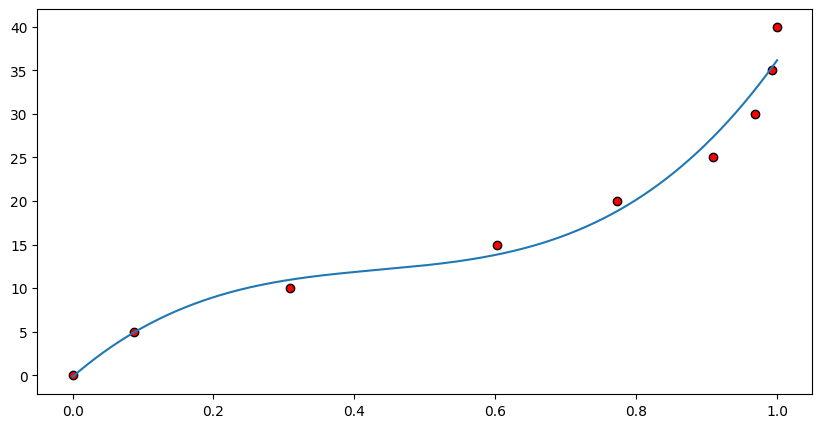

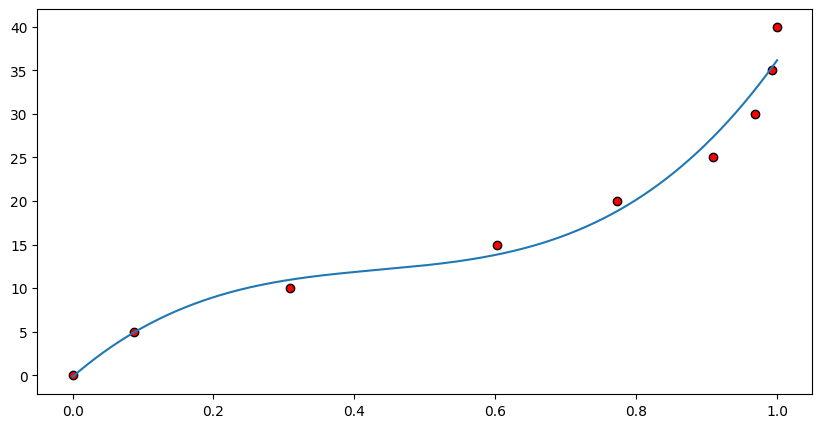

In [477]:
ajusta_polinomio(df_duracoes, 3)

In [478]:
def gerar_tabela_nan(df_tabela_ligantes: pd.DataFrame,
                     df_duracoes: pd.DataFrame,
                     tempo_maximo_espera: float = 10,
                     tempo_descanso: int = 0,
                     g: int = 5) -> list:

    """
    Função para gerar a lista de NANs para cada período do dia

    Args:
        df_tabela_ligantes (pd.DataFrame): DataFrame com a quantidade de ligantes. 
        (obrigatório)
        df_duracoes (pd.DataFrame): DataFrame com as durações das ligações. 
        (obrigatório)
        tempo_maximo_espera (float): Tempo máximo de espera (opcional, default=10)
        g (int): Grau do polinômio de ajuste (opcional, default=5)
    Returns:
        pd.DataFrame: DataFrame com a quantidade de NANs
    """

    coefs = metodo_minimos_quadrados.mmq(
        entradas=df_duracoes.loc[:, "percentagem_acumulada"],
        saidas=df_duracoes.loc[:, "duracao_conexao"],
        g=g)


    # conjunto de nan para cada periodo do dia 
    # (18:15 - 18:30, 18:30 - 18:45, ..., 18:00 - 18:15)
    coluna_nan = []

    # para cada linha (periodo do dia) da tabela de ligantes (96 linhas)
    for i, linha in df_tabela_ligantes.iterrows():

        # pega a qtd_ligantes para cada periodo do dia
        qtd_ligantes = linha["numero_medio_ligantes"]

        # gera aleatoriamente os momentos de ligação para cada periodo do dia
        momentos_ligacoes = np.random.randint(low=0, high=900, size=qtd_ligantes)
        # ordena os momentos de ligação para executar o algoritmo nan
        momentos_ligacoes.sort()
        
        # cria uma lista de atendentes necessários para atender as ligações para cada 
        # periodo do dia
        atendentes: list[dict] = []

        # para cada ligação
        for momento_ligacao in momentos_ligacoes:
            
            # gerando a duração da ligação
            aleatorio = np.random.rand()

            # gerando a duração da ligação
            duracao = abs(np.polyval(coefs, aleatorio))

            # para cada atendente, checar se ele estará ocupado no momento da 
            # ligação + tempo máximo de espera. Se não estiver, ele atende a ligação
            # se todos estiverem ocupados, criar um novo atendente
            for atendente in atendentes:

                fim_atendimento = atendente["fim_atendimento"] + tempo_descanso

                # checando se o atendente está ocupado daqui a 10 segundos do momento 
                # da ligação ocupado = atendente.checar_ocupado(momento_ligacao + 10)
                if momento_ligacao + tempo_maximo_espera > fim_atendimento:
                    ocupado = False
                else:
                    ocupado = True

                if not ocupado:
                    # se o atendente não estiver ocupado, ele atende a ligação
                    # atendente.atender_ligacao_futura(duracao)
                    if momento_ligacao + tempo_maximo_espera > fim_atendimento:
                        atendente["inicio_atendimento"] = \
                            momento_ligacao + tempo_maximo_espera
                    else:
                        atendente["inicio_atendimento"] = fim_atendimento
                    
                    atendente["fim_atendimento"] = \
                        atendente["inicio_atendimento"] + duracao
                    break
            else:
                # entra aqui apenas se nunca ocorrer o break (ou seja, 
                # se todos os atendentes estiverem ocupados)

                novo_atendende = {"inicio_atendimento": momento_ligacao, 
                                "fim_atendimento": momento_ligacao + duracao}
                atendentes.append(novo_atendende)

        # após 'varrer' todas as ligações simuladas de cada período do dia, coletar a 
        # quantidade de atendentes criados para atender todas as ligações com 
        # 10 segundos de tempo máximo de espera    
        nan = len(atendentes)
        
        # antes de partir para a simulação do próximo período do dia, adicionar o 
        # resultado na coleção de nan para cada período do dia
        coluna_nan.append(nan)

    return coluna_nan

In [479]:
gerar_tabela_nan(df_tabela_ligantes,
                 df_duracoes,
                 10, 0, 5)

[20,
 9,
 8,
 10,
 8,
 6,
 6,
 7,
 6,
 4,
 5,
 5,
 5,
 4,
 4,
 5,
 3,
 3,
 3,
 4,
 5,
 4,
 4,
 3,
 5,
 8,
 7,
 8,
 18,
 21,
 23,
 23,
 39,
 47,
 38,
 42,
 60,
 63,
 62,
 67,
 71,
 73,
 69,
 71,
 67,
 74,
 65,
 68,
 54,
 63,
 59,
 61,
 61,
 68,
 67,
 69,
 67,
 65,
 63,
 63,
 66,
 72,
 70,
 68,
 65,
 67,
 71,
 72,
 76,
 70,
 75,
 66,
 52,
 52,
 46,
 50,
 44,
 37,
 40,
 38,
 41,
 38,
 37,
 37,
 34,
 35,
 30,
 29,
 30,
 26,
 28,
 28,
 25,
 17,
 16,
 19]

In [480]:
def gera_tabelas(
        qtd_horas_total, minutos_dividir,
        hora_inicial, minuto_inicial,
        turnos, encargos):

    hora_final = (hora_inicial + qtd_horas_total) % 24
    minuto_final = (qtd_horas_total - int(qtd_horas_total)) * 60

    dia_final = 1
    if hora_inicial == hora_final and minuto_inicial == minuto_final:
        dia_final = 2
    
    inicios = \
        pd.date_range(
        start=f"2000-01-01 {hora_inicial:02}:{minuto_inicial:02}:00",
        end=dtm.strptime(
        f"2000-01-{dia_final:02} {int(hora_final):02}:{int(minuto_final):02}:59", "%Y-%m-%d %H:%M:%S"),
        freq=f"{minutos_dividir}min").strftime("%H:%M:%S").tolist()[:-1]
    
    finais = \
        [(dtm.strptime(inicio, "%H:%M:%S") + td(minutes=minutos_dividir)).strftime("%H:%M:%S") 
        for inicio in inicios]
    
    df_nad = pd.DataFrame({
        "regime": turnos,
        "enc": encargos})
    
    df_tabela_ligantes = pd.DataFrame({
        "rotulo": range(1, len(inicios) + 1),
        "hora_inicio": inicios,
        "hora_fim": finais})
    df_tabela_ligantes["numero_medio_ligantes"] = ""

    return df_nad, df_tabela_ligantes

In [481]:
encargos = [560, 640, 960]

In [482]:
turnos = [3, 4, 6]

In [483]:
df_nad, df_tabela_ligantes = gera_tabelas(qtd_dias_total, minutos_dividir,
                                          hora_inicial, minuto_inicial,
                                          turnos, encargos)

In [484]:
df_nad

,regime,enc
0,3,560
1,4,640
2,6,960


In [485]:
df_tabela_ligantes # ta vazia a coluna, vai ser o modelo de OS realtorio de OS, isso que vai preencher isso, dificil variar de cada cliente e o seu codigo ja conseguir converter  certinho para calcular
# por isso é melhor no formato de comsultoria o attetus por que o formato desse OS que é uma tabela de cada cliente esta de um jeito diferente
# o cliente que teria que preencher os dados dftabela_ligantes

,rotulo,hora_inicio,hora_fim,numero_medio_ligantes
0,1,00:00:00,00:15:00,
1,2,00:15:00,00:30:00,
2,3,00:30:00,00:45:00,
3,4,00:45:00,01:00:00,


In [486]:
df_duracoes # essa é outra tabela critica que tem que ser preenchida e o usuario porvavel nao vai saber preencher ceeto

,duracao_conexao,numero_ligantes,percentagem_relativa,percentagem_acumulada
0,0,0,0.000,0.000
1,5,870,0.087,0.087
2,10,2210,0.221,0.308
3,15,2940,0.294,0.602
4,20,1710,0.171,0.773
5,25,1360,0.136,0.909
6,30,590,0.059,0.968
7,35,250,0.025,0.993
8,40,70,0.007,1.000
